<a href="https://colab.research.google.com/github/StefanoBergia/Tensorflow/blob/main/CIM_power_consumption_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [3]:
train_data = pd.read_csv('train_EOS_071022.csv')
train_data

,Unnamed: 0,Unnamed: 0.1,timestamp,AhuOaTmp,AhuRmCO2,AhuRmRh,AhuRmTmp,AhuSaFanEffFl,CorrenteFaseI1,CorrenteFaseI2,...,"Zone [1,2] Solid support (mm²)","Zone [2,1] (mm²)","Zone [2,1] Part (mm²)","Zone [2,1] Non solid support (mm²)","Zone [2,1] Solid support (mm²)","Zone [2,2] (mm²)","Zone [2,2] Part (mm²)","Zone [2,2] Non solid support (mm²)","Zone [2,2] Solid support (mm²)",KWh
0,1,4,2022-10-07 17:09:08,24.520000,0.0,55.342105,22.200000,3370.841145,17.950592,6.497553,...,0,12271.907276,11699.416983,572.490293,0,12694.222682,11780.875744,913.346938,0,0.257827
1,2,5,2022-10-07 17:10:26,24.615455,0.0,55.431818,22.200000,3367.645045,17.708121,16.013545,...,0,12281.074810,11708.584517,572.490293,0,12703.376707,11790.029769,913.346938,0,0.191637
2,3,6,2022-10-07 17:11:32,24.620000,0.0,55.232468,22.200000,3367.092182,18.422675,17.006338,...,0,12290.239103,11717.748810,572.490293,0,12712.530216,11799.183278,913.346938,0,0.267615
3,4,7,2022-10-07 17:12:49,24.620000,0.0,55.223881,22.200000,3367.388940,18.249687,15.693896,...,0,12299.571374,11727.081081,572.490293,0,12721.864098,11808.517160,913.346938,0,0.231872
4,5,8,2022-10-07 17:13:57,24.627051,0.0,55.126923,22.200000,3365.587269,14.418833,16.036538,...,0,12313.155855,11740.665563,572.490293,0,12735.436426,11822.089488,913.346938,0,0.216707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,6196,6199,2022-10-10 12:46:07,16.440000,0.0,60.300000,23.700000,2652.122652,17.009739,18.448478,...,0,3970.380690,3970.380690,0.000000,0,7395.290844,7395.290844,0.000000,0,0.108200
6196,6197,6200,2022-10-10 12:46:53,16.440000,0.0,60.300000,23.700000,2653.417477,16.081841,15.464023,...,0,3970.219116,3970.219116,0.000000,0,7397.462426,7397.462426,0.000000,0,0.133276
6197,6198,6201,2022-10-10 12:47:37,16.440000,0.0,60.300000,23.700000,2050.060545,14.554568,12.388773,...,0,3970.463253,3970.463253,0.000000,0,7399.830654,7399.830654,0.000000,0,0.123270
6198,6199,6202,2022-10-10 12:48:21,16.440000,0.0,60.204167,23.779167,1548.129333,7.865813,5.458896,...,0,3970.707957,3970.707957,0.000000,0,7402.204370,7402.204370,0.000000,0,0.124375


In [7]:
test_data=pd.read_csv('test_EOS_071022.csv')
test_data

,Unnamed: 0,Unnamed: 0.1,timestamp,AhuOaTmp,AhuRmCO2,AhuRmRh,AhuRmTmp,AhuSaFanEffFl,CorrenteFaseI1,CorrenteFaseI2,...,"Zone [1,2] Solid support (mm²)","Zone [2,1] (mm²)","Zone [2,1] Part (mm²)","Zone [2,1] Non solid support (mm²)","Zone [2,1] Solid support (mm²)","Zone [2,2] (mm²)","Zone [2,2] Part (mm²)","Zone [2,2] Non solid support (mm²)","Zone [2,2] Solid support (mm²)",KWh
0,6201,6204,2022-10-10 12:49:55,16.340000,0.0,60.078261,23.9,2076.767696,17.199957,19.160457,...,0,3972.254730,3972.254730,0.0,0,7407.411267,7407.411267,0.0,0,0.100211
1,6202,6205,2022-10-10 12:50:41,16.340000,0.0,59.900000,23.9,2647.676783,17.437348,15.366000,...,0,3973.170037,3973.170037,0.0,0,7410.085320,7410.085320,0.0,0,0.150353
2,6203,6206,2022-10-10 12:51:27,16.340000,0.0,59.900000,23.9,2645.854909,18.410909,16.427523,...,0,3974.515017,3974.515017,0.0,0,7412.948335,7412.948335,0.0,0,0.153962
3,6204,6207,2022-10-10 12:52:11,16.394348,0.0,59.900000,23.9,2649.464522,11.682283,15.487826,...,0,3975.993250,3975.993250,0.0,0,7415.866359,7415.866359,0.0,0,0.138932
4,6205,6208,2022-10-10 12:52:57,16.444545,0.0,59.900000,23.9,2652.304318,15.732682,9.756773,...,0,3977.635117,3977.635117,0.0,0,7418.860790,7418.860790,0.0,0,0.131929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,7575,7578,2022-10-10 23:41:58,14.040000,0.0,60.600000,23.4,2658.141200,16.094000,16.836200,...,0,338.728970,338.728970,0.0,0,943.369732,943.369732,0.0,0,0.023872
1375,7576,7579,2022-10-10 23:42:08,14.040000,0.0,60.600000,23.4,2658.545500,15.123429,18.701286,...,0,338.729043,338.729043,0.0,0,943.369915,943.369915,0.0,0,0.034671
1376,7577,7580,2022-10-10 23:42:22,14.040000,0.0,60.600000,23.4,2659.218375,13.271125,14.836875,...,0,338.727519,338.727519,0.0,0,943.369978,943.369978,0.0,0,0.015888
1377,7578,7581,2022-10-10 23:42:30,1.755000,0.0,60.600000,23.4,1163.326500,14.353563,14.274937,...,0,338.728209,338.728209,0.0,0,943.370189,943.370189,0.0,0,0.034387


In [6]:
plt.figure(figsize=(16,9))
fig = px.line(train_data, x=train_data[train_data.columns[0]], y='KWh', title='Power consumption Job_38')
fig.update_xaxes(rangeslider_visible=True)
fig.show() 

<Figure size 1152x648 with 0 Axes>

In [8]:
input_features=['Height (mm)', 'Total slice surface (mm²)', 'Part (mm²)',
       'Non solid support (mm²)',  'Zone [1,1] (mm²)',
       'Zone [1,1] Part (mm²)', 
       'Zone [1,1] Non solid support (mm²)', 'Zone [1,2] (mm²)',
       'Zone [1,2] Part (mm²)',
       'Zone [1,2] Non solid support (mm²)', 'Zone [2,1] (mm²)',
       'Zone [2,1] Part (mm²)', 'Zone [2,1] Non solid support (mm²)',
       'Zone [2,2] (mm²)',
       'Zone [2,2] Part (mm²)', 'Zone [2,2] Non solid support (mm²)'
       ]

output_feature='KWh'



In [9]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [10]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()


x_train = X_scaler.fit_transform(train_data[input_features])
y_train = Y_scaler.fit_transform(train_data[[output_feature]])

x_vali = X_scaler.fit_transform(test_data[input_features])
y_vali = Y_scaler.fit_transform(test_data[[output_feature]])

In [11]:
hist_window = 32
horizon = 1


x_train, y_train = custom_ts_multi_data_prep(x_train, y_train, 0, None, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(x_vali,y_vali, 0, None, hist_window, horizon)


In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_vali.shape)
print(y_vali.shape)

(6167, 32, 16)
(1346, 1, 1)
(1346, 32, 16)
(1346, 1, 1)


In [13]:
batch_size = 256
buffer_size = 150

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [14]:
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                              input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=horizon),
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 32, 400)          347200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 32, 20)            8020      
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              205200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 20)                6020      
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0

In [15]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [16]:
history = lstm_model.fit(train_data,epochs=150,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/150
100/100 [==============================] - 100s 931ms/step - loss: 0.0241 - val_loss: 0.0187
Epoch 2/150
100/100 [==============================] - 88s 877ms/step - loss: 0.0102 - val_loss: 0.0138
Epoch 3/150
100/100 [==============================] - 82s 826ms/step - loss: 0.0049 - val_loss: 0.0115
Epoch 4/150
100/100 [==============================] - 83s 830ms/step - loss: 0.0049 - val_loss: 0.0131
Epoch 5/150
100/100 [==============================] - 85s 847ms/step - loss: 0.0060 - val_loss: 0.0133
Epoch 6/150
100/100 [==============================] - 83s 828ms/step - loss: 0.0050 - val_loss: 0.0144
Epoch 7/150
100/100 [==============================] - 83s 829ms/step - loss: 0.0047 - val_loss: 0.0150
Epoch 8/150
100/100 [==============================] - 82s 821ms/step - loss: 0.0048 - val_loss: 0.0172
Epoch 9/150
100/100 [==============================] - 83s 834ms/step - loss: 0.0055 - val_loss: 0.0450
Epoch 10/150
100/100 [==============================] - 82s 821

In [ ]:
##########################################

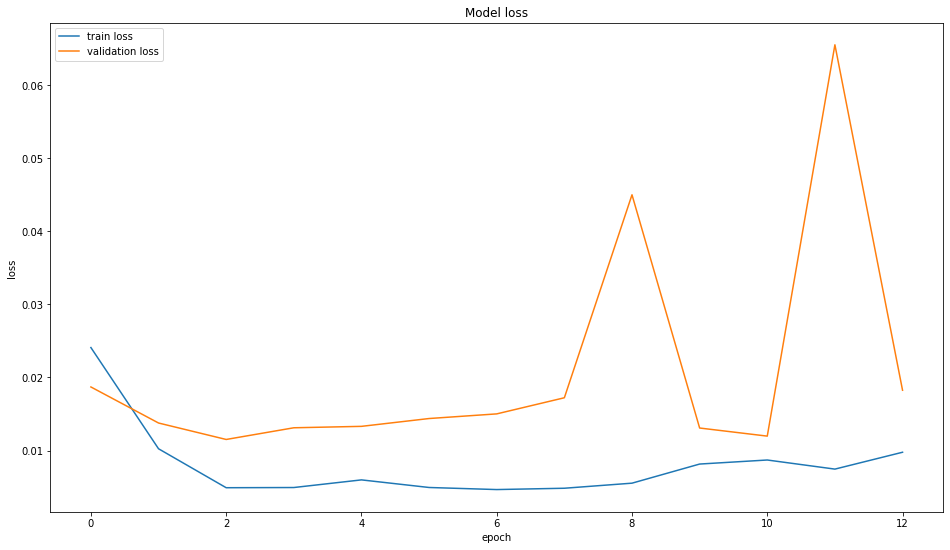

In [17]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [19]:
val_pred= lstm_model.predict(x_vali)
val_pred = Y_scaler.inverse_transform(val_pred)

43/43 [==============================] - 4s 62ms/step


In [38]:
val_pred=val_pred.reshape(1,-1)[0]
val_pred

array([0.11390482, 0.1139265 , 0.11394852, ..., 0.0460964 , 0.04610121,
       0.04610603], dtype=float32)

In [39]:
print(len(val_pred))
print(len(test_data[output_feature]))

1346
1379


In [41]:
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
index=test_data[test_data.columns[0]].iloc[-len(val_pred):]

print(index)
print(val_pred)
fig=go.Figure()
fig.add_traces(go.Scatter(x=index,y=test_data[output_feature][-len(val_pred):],mode='lines',visible=True))
fig.add_traces(go.Scatter(x=index,y=val_pred,mode='lines',visible=True))
fig.show()

33      6234
34      6235
35      6236
36      6237
37      6238
        ... 
1374    7575
1375    7576
1376    7577
1377    7578
1378    7579
Name: Unnamed: 0, Length: 1346, dtype: int64
[0.11390482 0.1139265  0.11394852 ... 0.0460964  0.04610121 0.04610603]


In [43]:
train_data = pd.read_csv('train_EOS_071022.csv')
x_vali = X_scaler.fit_transform(train_data[input_features])
y_vali = Y_scaler.fit_transform(train_data[[output_feature]])
val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

val_pred= lstm_model.predict(x_train)
val_pred = Y_scaler.inverse_transform(val_pred)
val_pred=val_pred.reshape(1,-1)[0]

index=train_data[train_data.columns[0]].iloc[-len(val_pred):]

print(index)
print(val_pred)
fig=go.Figure()
fig.add_traces(go.Scatter(x=index,y=train_data[output_feature][-len(val_pred):],mode='lines',visible=True))
fig.add_traces(go.Scatter(x=index,y=val_pred,mode='lines',visible=True))
fig.show()

193/193 [==============================] - 13s 66ms/step
33        34
34        35
35        36
36        37
37        38
        ... 
6195    6196
6196    6197
6197    6198
6198    6199
6199    6200
Name: Unnamed: 0, Length: 6167, dtype: int64
[0.18589538 0.1867975  0.18754438 ... 0.1257418  0.12574074 0.12572336]


In [ ]:
#pred_EOS = lstm_model.predict(val_rescaled_EOS)
#pred_EOS = Y_scaler_2.inverse_transform(pred_EOS)

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
#timeseries_evaluation_metrics_func(validate['traffic_volume'],pred_Inverse[0])

In [ ]:
# plt.figure(figsize=(16,9))
# plt.plot( list(validate['traffic_volume']))
# plt.plot( list(pred_Inverse[0]))
# plt.title("Actual vs Predicted")
# plt.ylabel("Traffic volume")
# plt.legend(('Actual','predicted'))
# plt.show()